In [122]:
import json
from zipfile import ZipFile
from pathlib import Path
from itertools import chain

import numpy as np
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

from myutils.spatial import get_earth_distances

In [2]:
with ZipFile('../data/raw/spb_osm.json.zip') as zipfile:
    with zipfile.open('spb_osm.json') as file:
        spb_osm = json.load(file)
        
spb_osm = spb_osm['elements']

len(spb_osm)

3741723

In [100]:
df = pd.DataFrame(spb_osm)

df.head(2)

,type,id,lat,lon,tags,nodes,members
0,node,2,59.771793,30.326111,"{'historic': 'memorial', 'image': 'https://upl...",NaN,NaN
1,node,219779,59.842673,30.320486,NaN,NaN,NaN


In [101]:
def is_subway_route(tags: dict) -> bool:
    return isinstance(tags, dict) and tags.get('type') == 'route' and tags.get('route') == 'subway'


df['is_subway_route'] = df['tags'].apply(is_subway_route)

In [114]:
subway_routes = df[df['is_subway_route']].copy()

subway_routes['name'] = subway_routes['tags'].apply(lambda x: x.get('name'))

subway_routes.head()

,type,id,lat,lon,tags,nodes,members,is_subway_route,is_subway_entrance,name
3715037,relation,252536,NaN,NaN,"{'colour': 'green', 'from': 'Рыбацкое', 'name'...",NaN,"[{'type': 'node', 'ref': 8504823754, 'role': '...",True,False,Невско-Василеостровская линия: Рыбацкое — Беговая
3715038,relation,252537,NaN,NaN,"{'colour': 'orange', 'from': 'Улица Дыбенко', ...",NaN,"[{'type': 'node', 'ref': 8512025927, 'role': '...",True,False,Правобережная линия: Улица Дыбенко — Спасская
3715039,relation,252539,NaN,NaN,"{'colour': 'red', 'from': 'Проспект Ветеранов'...",NaN,"[{'type': 'node', 'ref': 2035112368, 'role': '...",True,False,Кировско-Выборгская линия: Проспект Ветеранов ...
3715040,relation,252540,NaN,NaN,"{'colour': 'blue', 'from': 'Парнас', 'name': '...",NaN,"[{'type': 'node', 'ref': 1941204769, 'role': '...",True,False,Московско-Петроградская линия: Парнас — Купчино
3715041,relation,252541,NaN,NaN,"{'colour': 'purple', 'from': 'Шушары', 'name':...",NaN,"[{'type': 'node', 'ref': 4709806345, 'role': '...",True,False,Фрунзенско-Приморская линия: Шушары — Комендан...


In [120]:
subway_station_ids = {elem['ref'] for _, route in subway_routes.iterrows() for elem in route['members'] if elem['type'] == 'node'}

subway_stations = df[df['id'].isin(subway_station_ids)].copy()

subway_stations

,type,id,lat,lon,tags,nodes,members,is_subway_route,is_subway_entrance
220252,node,695145190,59.820061,30.432784,"{'name': 'Шушары', 'public_transport': 'stop_p...",NaN,NaN,False,False
1028183,node,1669571980,59.915364,30.318245,"{'name': 'Технологический институт 2', 'networ...",NaN,NaN,False,False
1221910,node,1941204769,60.066883,30.334025,"{'name': 'Парнас', 'network': 'Петербургский м...",NaN,NaN,False,False
1221911,node,1941204771,60.066922,30.334062,"{'name': 'Парнас', 'network': 'Петербургский м...",NaN,NaN,False,False
1253751,node,2031423600,59.915186,30.317480,"{'name': 'Технологический институт 1', 'networ...",NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...
3145383,node,8518165895,60.009937,30.374217,"{'name': 'Политехническая', 'public_transport'...",NaN,NaN,False,False
3145384,node,8518165896,60.012031,30.392802,"{'name': 'Академическая', 'public_transport': ...",NaN,NaN,False,False
3145385,node,8518165897,60.012197,30.392681,"{'name': 'Академическая', 'public_transport': ...",NaN,NaN,False,False
3145386,node,8518165898,60.033215,30.417004,"{'name': 'Гражданский проспект', 'public_trans...",NaN,NaN,False,False


{3516091353, 3516091354}

In [124]:
members = pd.DataFrame(list(chain.from_iterable(subway_routes['members'])))

members[members['ref'].isin(subway_station_ids - set(subway_stations['id']))]

,type,ref,role
42,node,3516091354,stop_exit_only
135,node,3516091353,stop_entry_only


In [108]:
def is_subway_entrance(tags: dict) -> bool:
    return isinstance(tags, dict) and tags.get('railway') == 'subway_entrance'


df['is_subway_entrance'] = df['tags'].apply(is_subway_entrance)

In [ ]:
def is_subway_station

In [113]:
mask = (df['type'] == 'node') & (df['is_subway_entrance'])
subway_entrances = df.loc[mask].copy()

subway_entrances['color'] = subway_entrances['tags'].apply(lambda x: x.get('colour'))
subway_entrances['name'] = subway_entrances['tags'].apply(lambda x: x.get('name:ru', x.get('name')))

subway_entrances

,type,id,lat,lon,tags,nodes,members,is_subway_route,is_subway_entrance,color,name
60006,node,268479754,59.966269,30.311449,"{'check_date:opening_hours': '2021-04-04', 'co...",NaN,NaN,False,True,blue,Петроградская
74616,node,309943041,59.907268,30.483216,"{'colour': 'orange', 'name': 'Улица Дыбенко', ...",NaN,NaN,False,True,orange,Улица Дыбенко
80580,node,316828146,59.923673,30.383664,"{'colour': 'orange', 'fee': 'yes', 'name': 'Пл...",NaN,NaN,False,True,orange,Площадь Александра Невского 2
81972,node,318455877,59.931567,30.360852,"{'colour': 'red', 'entrance': 'entrance', 'nam...",NaN,NaN,False,True,red,Площадь Восстания - 1
101261,node,348148610,59.944505,30.359522,"{'colour': 'red', 'entrance': 'main', 'fee': '...",NaN,NaN,False,True,red,Чернышевская
...,...,...,...,...,...,...,...,...,...,...,...
2643248,node,6852633083,59.852030,30.269696,"{'colour': 'red', 'name': 'Ленинский проспект'...",NaN,NaN,False,True,red,Ленинский проспект
2816553,node,7473385123,59.920751,30.354990,"{'colour': 'orange', 'name': 'Лиговский проспе...",NaN,NaN,False,True,orange,Лиговский проспект
2816633,node,7473625772,59.928260,30.346339,"{'colour': 'orange', 'name': 'Достоевская', 'n...",NaN,NaN,False,True,orange,Достоевская
3153184,node,8582205547,59.951836,30.290692,"{'colour': 'purple', 'entrance': 'main', 'name...",NaN,NaN,False,True,purple,Спортивная вход 1


In [37]:
subway_entrances = df.loc[mask].copy()

subway_entrances

,type,id,lat,lon,tags,nodes,members,is_subway_entrance,is_subway_station,color,name
60006,node,268479754,59.966269,30.311449,"{'check_date:opening_hours': '2021-04-04', 'co...",NaN,NaN,True,False,blue,Петроградская
74616,node,309943041,59.907268,30.483216,"{'colour': 'orange', 'name': 'Улица Дыбенко', ...",NaN,NaN,True,False,orange,Улица Дыбенко
80580,node,316828146,59.923673,30.383664,"{'colour': 'orange', 'fee': 'yes', 'name': 'Пл...",NaN,NaN,True,False,orange,Площадь Александра Невского 2
81972,node,318455877,59.931567,30.360852,"{'colour': 'red', 'entrance': 'entrance', 'nam...",NaN,NaN,True,False,red,Площадь Восстания - 1
101261,node,348148610,59.944505,30.359522,"{'colour': 'red', 'entrance': 'main', 'fee': '...",NaN,NaN,True,False,red,Чернышевская
...,...,...,...,...,...,...,...,...,...,...,...
2643248,node,6852633083,59.852030,30.269696,"{'colour': 'red', 'name': 'Ленинский проспект'...",NaN,NaN,True,False,red,Ленинский проспект
2816553,node,7473385123,59.920751,30.354990,"{'colour': 'orange', 'name': 'Лиговский проспе...",NaN,NaN,True,False,orange,Лиговский проспект
2816633,node,7473625772,59.928260,30.346339,"{'colour': 'orange', 'name': 'Достоевская', 'n...",NaN,NaN,True,False,orange,Достоевская
3153184,node,8582205547,59.951836,30.290692,"{'colour': 'purple', 'entrance': 'main', 'name...",NaN,NaN,True,False,purple,Sportivnaya entrance 1


In [62]:
coords = subway_entrances[['lat', 'lon']].values

entrance_distances = get_earth_distances(coords, coords)
entrance_distances[np.arange(entrance_distances.shape[0]), np.arange(entrance_distances.shape[0])] = np.inf

entrance_distances

array([[        inf, 11.6012829 ,  6.2134636 , ...,  4.65159156,
         1.97751247,  1.92378426],
       [11.6012829 ,         inf,  5.84114761, ...,  7.97804449,
        11.81609787, 11.80795911],
       [ 6.2134636 ,  5.84114761,         inf, ...,  2.14143634,
         6.05191837,  6.04987898],
       ...,
       [ 4.65159156,  7.97804449,  2.14143634, ...,         inf,
         4.05943174,  4.06601121],
       [ 1.97751247, 11.81609787,  6.05191837, ...,  4.05943174,
                inf,  0.05376876],
       [ 1.92378426, 11.80795911,  6.04987898, ...,  4.06601121,
         0.05376876,         inf]])

In [90]:
argmin = np.argmin(entrance_distances, axis=0)

edges = [
    (subway_entrances['id'].iloc[i], subway_entrances['id'].iloc[j])
    for i, j in enumerate(argmin)
    if entrance_distances[i, j] <= 1
]

In [91]:
pos = dict(zip(subway_entrances['id'], coords[:, ::-1]))

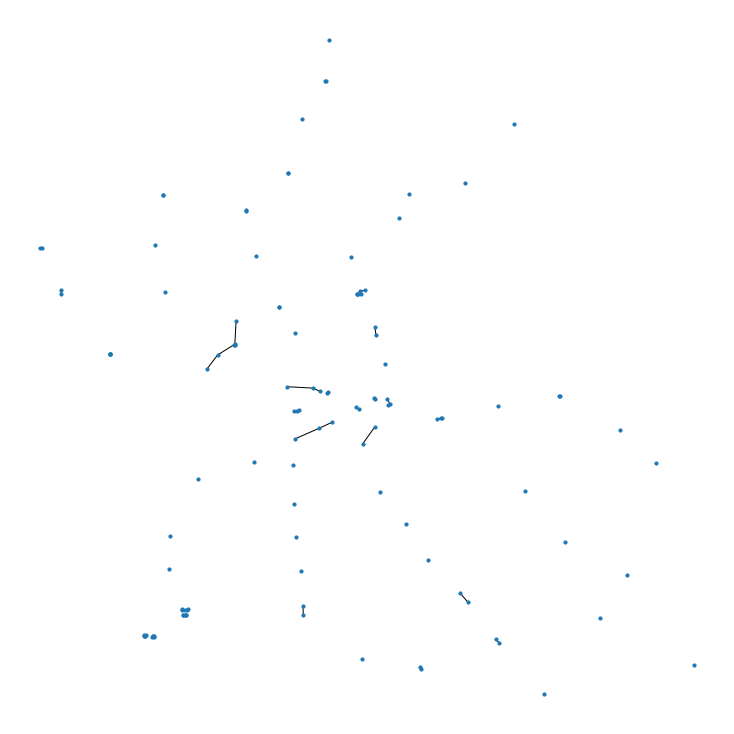

In [92]:
g = nx.Graph()
g.add_nodes_from(subway_entrances['id'])
g.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(g, pos, node_size=10)

In [93]:
for c in nx.connected_components(g):
    print(subway_entrances.loc[subway_entrances['id'].isin(c), 'name'], '\n')

60006      Петроградская
1069483    Петроградская
Name: name, dtype: object 

74616    Улица Дыбенко
Name: name, dtype: object 

80580      Площадь Александра Невского 2
1002678    Площадь Александра Невского 1
2323646    Площадь Александра Невского 1
Name: name, dtype: object 

81972     Площадь Восстания - 1
428469    Площадь Восстания - 2
428479    Площадь Восстания - 2
Name: name, dtype: object 

101261    Чернышевская
Name: name, dtype: object 

101265    Гражданский проспект
Name: name, dtype: object 

124683    Электросила
Name: name, dtype: object 

162825     Невский проспект - 1
2284222          Адмиралтейская
2483935    Невский проспект - 2
Name: name, dtype: object 

203064    Фрунзенская
Name: name, dtype: object 

206574    Звёздная
Name: name, dtype: object 

207612    Парнас
Name: name, dtype: object 

207613    Озерки
Name: name, dtype: object 

207614    Московские ворота
Name: name, dtype: object 

221187    Проспект Просвещения
221189    Проспект Просвещения
Name: n

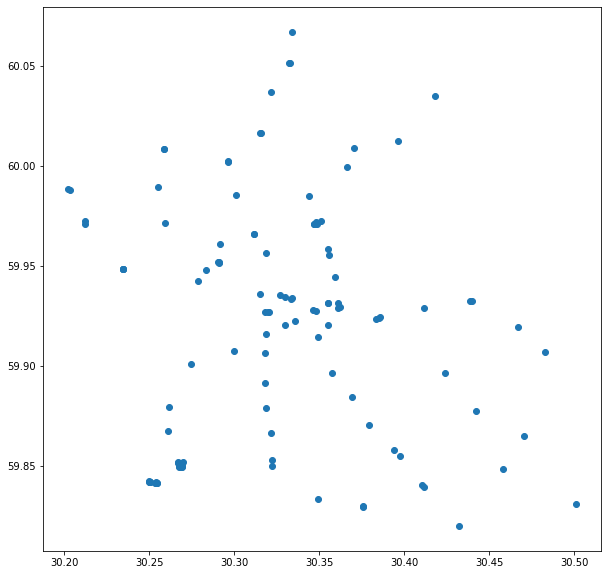

In [32]:
lonlat = df.loc[mask, ['lon', 'lat']].values

plt.figure(figsize=(10, 10))

plt.scatter(*lonlat.T)

In [33]:
df.loc[mask, 'tags'].tolist()

[{'check_date:opening_hours': '2021-04-04',
  'colour': 'blue',
  'name': 'Петроградская',
  'network': 'Петербургский метрополитен',
  'opening_hours': '05:35-00:28',
  'railway': 'subway_entrance'},
 {'colour': 'orange',
  'name': 'Улица Дыбенко',
  'network': 'Петербургский метрополитен',
  'opening_hours': '00:00-00:05,05:35-24:00',
  'railway': 'subway_entrance'},
 {'colour': 'orange',
  'fee': 'yes',
  'name': 'Площадь Александра Невского 2',
  'name:de': 'Ploschtschad Alexandra Newskogo 2',
  'name:ru': 'Площадь Александра Невского 2',
  'network': 'Петербургский метрополитен',
  'opening_hours': '07:00-20:00',
  'railway': 'subway_entrance'},
 {'colour': 'red',
  'entrance': 'entrance',
  'name': 'Площадь Восстания - 1',
  'name:de': 'Ploschtschad Wosstanija - 1',
  'name:en': 'Ploshchad Vosstaniya - 1',
  'name:fi': 'Ploštšad Vosstanija - 1',
  'name:ru': 'Площадь Восстания - 1',
  'network': 'Петербургский метрополитен',
  'opening_hours': 'Mo-Su 05:40-00:25',
  'operator': '

In [4]:
df['type'].value_counts()

node        3156034
way          558869
relation      26820
Name: type, dtype: int64